# Microestructura y Sistemas de Trading
##  Tarea 1: Effective Spread

José Armando Melchor Soto


---

## **Librerías** 

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

---

## **Funciones**

#### **Gráfica Spread**

In [189]:
def grafica_spread(df):
    columnas_spread = [c for c in df.columns if "Spread" in c]

    cmap = cm.get_cmap('tab20', len(columnas_spread))  
    
    plt.figure(figsize=(18, 8))

    for idx, col in enumerate(columnas_spread):
        plt.plot(df.index, df[col], label=col, color=cmap(idx))

    plt.title('Gráfica de Spreads APPL')
    plt.xlabel('Tiempo')
    plt.ylabel('Spread')
    plt.legend()
    plt.grid()
    plt.show()

#### **Gráfica Spread promedio**

In [190]:
def grafica_average(df):
    
    Average = DataFrame.plot(
        x='Window',
        y=['Block method', 'Serial Covariance'],
        kind='bar', 
        colormap='tab20',
        figsize=(18, 8)
    )
    
    plt.title('Comparación Average Spread APPL')
    plt.xlabel('Window')
    plt.ylabel('Average Spread')
    plt.legend()
    plt.grid()
    plt.show()

#### **Función Bid/Ask**

In [191]:
def Bid(df, windows):
    return np.where(df['diff'] > 0, df['Close'] - df[f'Spread_{windows}'], df['Close'])

def Ask(df, windows):
    return np.where(df['diff'] < 0, df['Close'] + df[f'Spread_{windows}'], df['Close'])

#### **Función Block Method**

In [192]:
def block_method(df1, windows):
   
    diff_col = next((c for c in df1.columns if c.lower() == 'diff'), None)
    if diff_col is None:
        raise KeyError("df1 debe tener columna 'Diff' (o 'diff').")

    for i in windows:
        n = len(df1)
        if 2*i > n:
            
            df1[f'Cov_{i}']    = [np.nan]*n
            df1[f'Spread_{i}'] = [np.nan]*n
            continue

        covs = [np.nan] * n  

        for k in range(n - 2*i + 1):
            up   = df1[diff_col].iloc[k       : k + i].to_numpy()
            down = df1[diff_col].iloc[k + i   : k + 2*i].to_numpy()

            cov = np.cov(up, down, bias=False)[0, 1]  
            covs[k + 2*i - 1] = cov                  

        df1[f'Cov_{i}']    = covs
        df1[f'Spread_{i}'] = 2 * np.sqrt(np.abs(df1[f'Cov_{i}']))

    bid_ask = pd.DataFrame(index=df1.index)
    for i in windows:
        bid_ask[f'Bid_{i}'] = Bid(df1, i)
        bid_ask[f'Ask_{i}'] = Ask(df1, i)
    
    grafica_spread(df1)

    return display(bid_ask)

#### **Función Serial Covariance**

In [193]:
def serial_covariance(df2, windows):
    for i in windows:
        df2[f'Cov_{i}'] = df2['diff'].rolling(window=i).cov(df2['diff_1'].shift(i))
        df2[f'Spread_{i}'] = 2 * np.sqrt(np.abs(df2[f'Cov_{i}']))

    bid_ask = pd.DataFrame()

    for window in windows:
        bid_ask[f'Bid_{window}'] = Bid(df2, window)
        bid_ask[f'Ask_{window}'] = Ask(df2, window)

    grafica_spread(df2)
    
    return display(bid_ask)

---

### Importación de Datos

In [194]:
df = pd.read_csv('aapl_5m_train.csv').drop(columns=['Unnamed: 0','Timestamp', 'Gmtoffset', 'Volume'])
df.head()

,Datetime,Open,High,Low,Close
0,2021-01-04 14:30:00,133.570007,133.611602,132.389999,132.809997
1,2021-01-04 14:35:00,132.750000,132.750000,131.809997,131.889999
2,2021-01-04 14:40:00,131.500000,132.339996,131.500000,132.059997
3,2021-01-04 14:45:00,132.000000,132.250000,131.899993,132.250000
4,2021-01-04 14:50:00,132.000000,132.018096,131.520004,131.589996


In [195]:
df1 = df.copy()
df1['diff'] = df1['Close'].diff() 
df1 = df1.dropna().reset_index(drop=True)
df1.head()

,Datetime,Open,High,Low,Close,diff
0,2021-01-04 14:35:00,132.75,132.750000,131.809997,131.889999,-0.919998
1,2021-01-04 14:40:00,131.50,132.339996,131.500000,132.059997,0.169998
2,2021-01-04 14:45:00,132.00,132.250000,131.899993,132.250000,0.190003
3,2021-01-04 14:50:00,132.00,132.018096,131.520004,131.589996,-0.660004
4,2021-01-04 14:55:00,132.00,132.089996,131.300003,131.448898,-0.141098


In [196]:
df2 = df1.copy()
df2['diff_1'] = df2['diff'].shift(1)
df2 = df2.dropna().reset_index(drop=True)
df2.head()

,Datetime,Open,High,Low,Close,diff,diff_1
0,2021-01-04 14:40:00,131.500000,132.339996,131.500000,132.059997,0.169998,-0.919998
1,2021-01-04 14:45:00,132.000000,132.250000,131.899993,132.250000,0.190003,0.169998
2,2021-01-04 14:50:00,132.000000,132.018096,131.520004,131.589996,-0.660004,0.190003
3,2021-01-04 14:55:00,132.000000,132.089996,131.300003,131.448898,-0.141098,-0.660004
4,2021-01-04 15:00:00,131.544998,131.669998,131.070007,131.119995,-0.328903,-0.141098


In [197]:
windows = [5, 10, 20, 50, 100]

C:\Users\ppmel\AppData\Local\Temp\ipykernel_28880\2411157010.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20', len(columnas_spread))


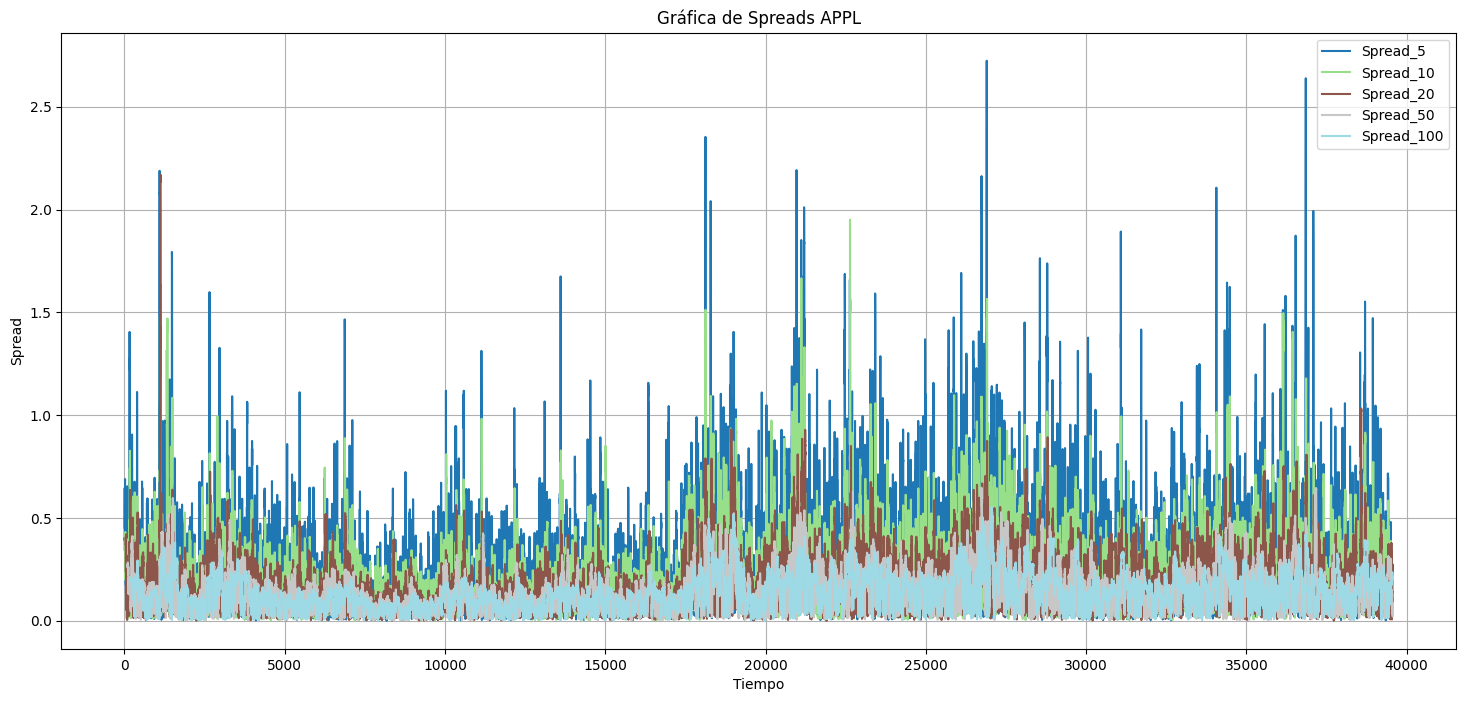

,Bid_5,Ask_5,Bid_10,Ask_10,Bid_20,Ask_20,Bid_50,Ask_50,Bid_100,Ask_100
0,131.889999,NaN,131.889999,NaN,131.889999,NaN,131.889999,NaN,131.889999,NaN
1,NaN,132.059997,NaN,132.059997,NaN,132.059997,NaN,132.059997,NaN,132.059997
2,NaN,132.250000,NaN,132.250000,NaN,132.250000,NaN,132.250000,NaN,132.250000
3,131.589996,NaN,131.589996,NaN,131.589996,NaN,131.589996,NaN,131.589996,NaN
4,131.448898,NaN,131.448898,NaN,131.448898,NaN,131.448898,NaN,131.448898,NaN
...,...,...,...,...,...,...,...,...,...,...
39567,128.911003,129.054992,128.990683,129.054992,128.968943,129.054992,129.008188,129.054992,128.854473,129.054992
39568,129.174315,129.380004,129.351767,129.380004,129.309047,129.380004,129.332813,129.380004,129.179958,129.380004
39569,129.588059,129.764404,129.571969,129.764404,129.655864,129.764404,129.727883,129.764404,129.561978,129.764404
39570,129.773803,129.949996,129.767916,129.949996,129.871503,129.949996,129.895281,129.949996,129.746514,129.949996


In [198]:
block_method(df1, windows)

C:\Users\ppmel\AppData\Local\Temp\ipykernel_28880\2411157010.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20', len(columnas_spread))


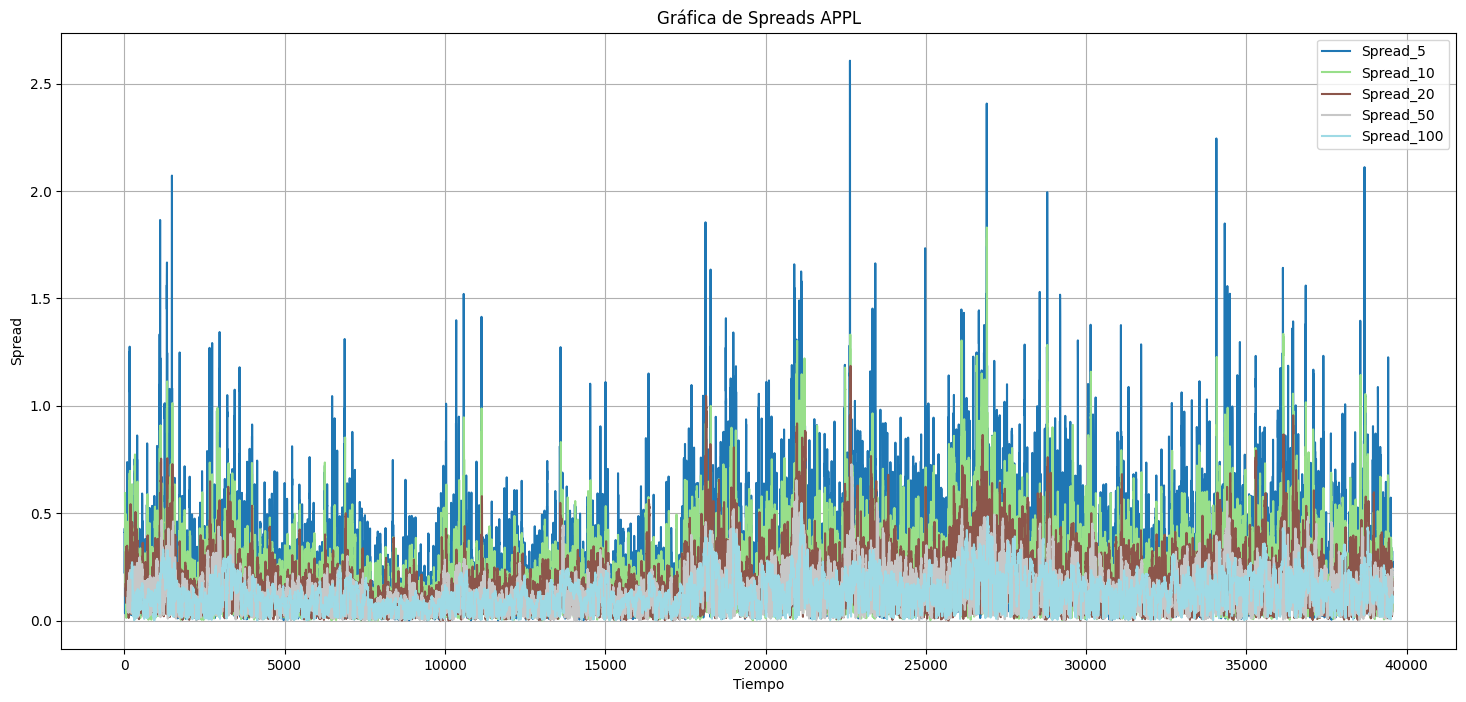

,Bid_5,Ask_5,Bid_10,Ask_10,Bid_20,Ask_20,Bid_50,Ask_50,Bid_100,Ask_100
0,NaN,132.059997,NaN,132.059997,NaN,132.059997,NaN,132.059997,NaN,132.059997
1,NaN,132.250000,NaN,132.250000,NaN,132.250000,NaN,132.250000,NaN,132.250000
2,131.589996,NaN,131.589996,NaN,131.589996,NaN,131.589996,NaN,131.589996,NaN
3,131.448898,NaN,131.448898,NaN,131.448898,NaN,131.448898,NaN,131.448898,NaN
4,131.119995,NaN,131.119995,NaN,131.119995,NaN,131.119995,NaN,131.119995,NaN
...,...,...,...,...,...,...,...,...,...,...
39566,128.897534,129.054992,128.956735,129.054992,128.909861,129.054992,128.833295,129.054992,128.962411,129.054992
39567,129.195542,129.380004,129.292516,129.380004,129.201451,129.380004,129.153494,129.380004,129.293785,129.380004
39568,129.490329,129.764404,129.688596,129.764404,129.585550,129.764404,129.521521,129.764404,129.681941,129.764404
39569,129.709738,129.949996,129.883765,129.949996,129.797776,129.949996,129.707924,129.949996,129.865062,129.949996


In [199]:
serial_covariance(df2, windows)

### Average Spread

In [200]:
DataFrame = pd.DataFrame({
    'Window': windows,
    'Block method' : [df1[f'Spread_{i}'].mean() for i in windows],
    'Serial Covariance' : [df2[f'Spread_{i}'].mean() for i in windows],
})
DataFrame

,Window,Block method,Serial Covariance
0,5,0.265275,0.262135
1,10,0.221454,0.221577
2,20,0.189835,0.191002
3,50,0.158118,0.155098
4,100,0.141632,0.135529


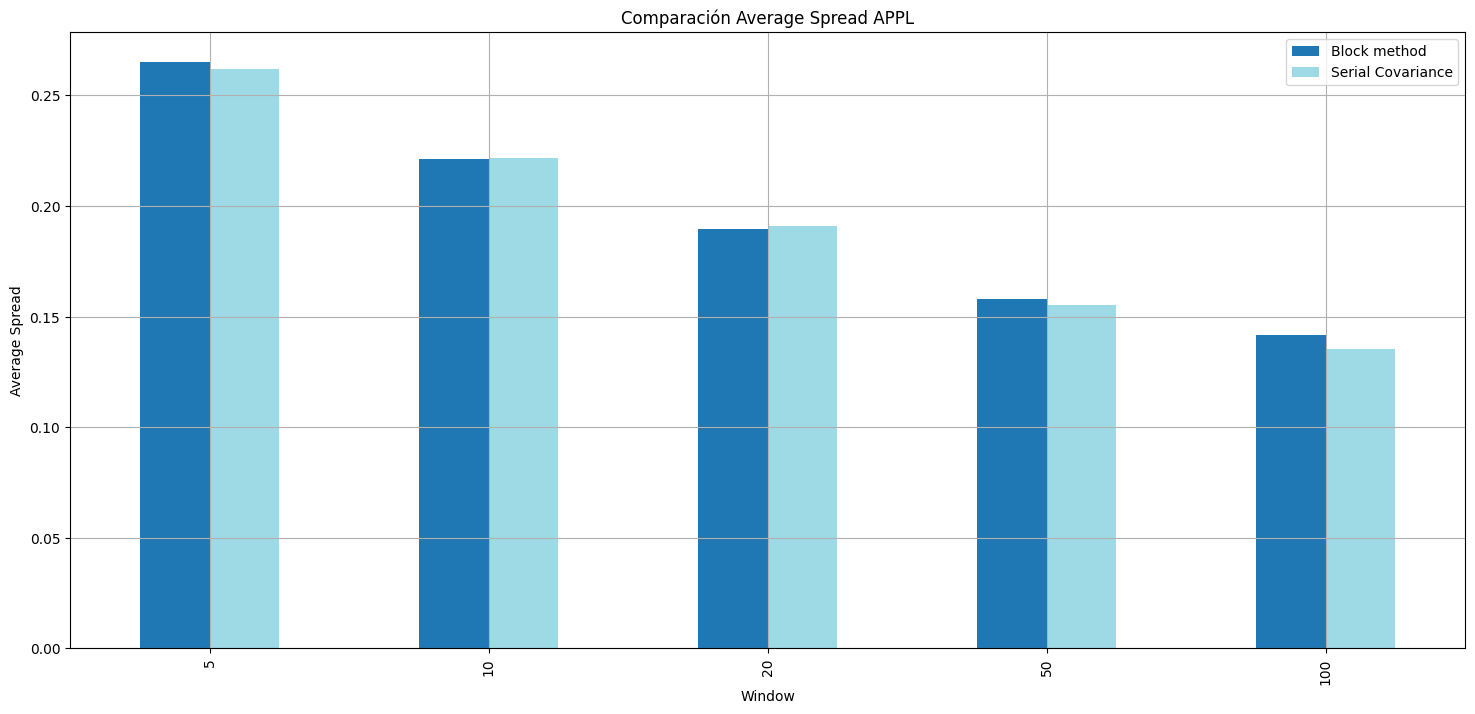

In [201]:
grafica_average(df)

### Análisis 

En conclusión, con los datos obtenidos en las gráficas, y enfocándome principalmente en la de Average Spread, puedo afirmar que el método más adecuado es el Block Method, ya que ofrece resultados mucho más estables y confiables para la estimación del spread, por lo que considero que es la mejor opción.

Además, la mejor ventana se encuentra en el rango de 20 a 50, ya que brinda un buen balance entre detalle y estabilidad. De esta forma, para el caso de la empresa Apple, el uso del Block Method con una ventana de 20–50 representa la alternativa más adecuada.